In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
sns.set(style="whitegrid", font_scale=1.2, context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [5]:
df

,x
0,580.38
1,581.86
2,580.97
3,580.80
4,579.79
...,...
93,578.52
94,579.74
95,579.31
96,579.89


# create data for AR($p$) in Dickey-Fuller test

In [6]:
def xyArray(df, p):
    dt = df.copy()
    dt.x = dt.x - dt.x.mean()
    X = np.ones((dt.shape[0] - p - 2 + 1, 1))
    X = np.concatenate([X, dt[p:-1]], axis=1)
    for i in range(1, p):
        X = np.concatenate([X, dt[p-i+1:-i].to_numpy() - dt[p-i:-i-1].to_numpy()], axis=1)
    y = dt[p+1:].to_numpy() - dt[p:-1].to_numpy()
    # print(y)
    return X, y


In [7]:
def AR(df, p):
    X,y = xyArray(df, p)
    beta = np.linalg.inv(X.T@X)@X.T@y
    S = np.sum((y - X@beta)**2)
    xbar = df[:-1].to_numpy().mean()
    e = np.sum((df[:-1].to_numpy() - xbar)**2)
    return beta, np.sqrt(S*e) / (df.shape[0] - p-2)

In [8]:
a = AR(df, 1)

In [9]:
a[0]

array([[-0.0241164],
       [-0.1780461]])

In [10]:
a[1]

0.928253791874368

In [11]:
djao = pd.read_csv('djao2.csv')

In [12]:
djao.drop(djao.columns[djao.columns.str.contains('Unnamed',case = True)],axis = 1, inplace = True)

In [13]:
djao

,DJ,AO
0,3621.63,1941.5
1,3634.21,1938.3
2,3615.76,1912.9
3,3633.65,1903.6
4,3630.85,1902.6
...,...,...
246,3751.22,2063.6
247,3775.83,2051.6
248,3846.73,2061.1
249,3829.89,2077.8


In [14]:
d1 = djao.to_numpy()

In [15]:
d2 = d1.copy()

In [16]:
d = (d2[1:] - d1[:-1]) / d1[:-1]

In [17]:
d *= 100

In [18]:
d

array([[ 0.34735741, -0.16482101],
       [-0.50767567, -1.31042666],
       [ 0.49477841, -0.48617283],
       [-0.0770575 , -0.05253204],
       [-0.48473498,  1.2036161 ],
       [-1.03646302, -0.07270839],
       [-1.07836009,  0.05716959],
       [ 0.27648675, -0.30646167],
       [-0.20496078,  0.48455166],
       [ 0.09492196,  0.9281344 ],
       [ 0.69402305, -0.17980992],
       [-0.04708916, -0.03602676],
       [ 0.00785189,  0.46851671],
       [-0.31349017,  0.66618838],
       [ 0.7310583 ,  0.42252087],
       [-0.09354641,  0.21797536],
       [ 0.26552927,  1.08750632],
       [ 0.32699052,  1.01576182],
       [-0.4267864 ,  0.18327719],
       [ 0.03097418,  0.1829419 ],
       [ 0.24185854,  0.67120719],
       [-0.00779204, -0.57848809],
       [ 0.27997874,  0.52268245],
       [ 0.51176874,  1.14784656],
       [ 0.2236562 ,  0.58680892],
       [ 0.34658225,  0.54963599],
       [-0.19191118, -0.47950132],
       [ 0.26902721, -1.14671164],
       [-0.24526076,

In [19]:
all = np.concatenate([np.ones((250,1)), d], axis=1)

In [20]:
X = all[0:-1]

In [21]:
X.shape

(249, 3)

In [22]:
y = all[1:,1:]

In [23]:
y.shape

(249, 2)

In [24]:
beta = np.linalg.inv(X.T@X)@X.T@y

In [25]:
beta

array([[ 0.02748849,  0.01229704],
       [-0.01517162,  0.67142411],
       [ 0.03574866,  0.0991333 ]])

In [26]:
import statsmodels.api as sm

In [27]:
def var(X):
    N, T = X.shape
    temp1 = np.zeros((N, N))
    temp2 = np.zeros((N, N))
    for t in range(1, T):
        temp1 += np.outer(X[:, t], X[:, t - 1])
        temp2 += np.outer(X[:, t - 1], X[:, t - 1])
    A = temp1 @ np.linalg.inv(temp2)
    # mat = np.append(X, np.zeros((N, pred_step)), axis = 1)
    # for s in range(pred_step):
    #     mat[:, T + s] = A @ mat[:, T + s - 1]
    return A

In [28]:
airpass = pd.read_csv("airpass.txt", delimiter=';')

In [29]:
airpass

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [30]:
airpass['D^2'] = airpass.Passengers.diff(2)

In [31]:
airpass

,Month,Passengers,D^2
0,1949-01,112,NaN
1,1949-02,118,NaN
2,1949-03,132,20.0
3,1949-04,129,11.0
4,1949-05,121,-11.0
...,...,...,...
139,1960-08,606,71.0
140,1960-09,508,-114.0
141,1960-10,461,-145.0
142,1960-11,390,-118.0


<AxesSubplot:>

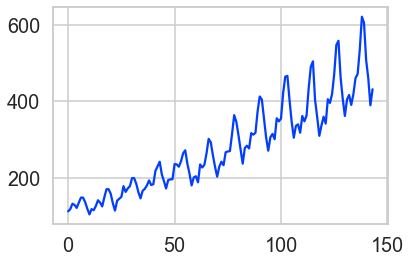

In [32]:
airpass.Passengers.plot()

In [33]:
airpass['logpass'] = airpass.Passengers.apply(np.log)

<AxesSubplot:>

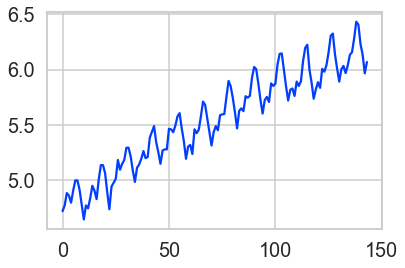

In [34]:
airpass.logpass.plot()

In [35]:
logpass = airpass.logpass.to_numpy()

In [36]:
logpass[11:]

array([4.77068462, 4.74493213, 4.83628191, 4.94875989, 4.90527478,
       4.82831374, 5.00394631, 5.13579844, 5.13579844, 5.06259503,
       4.89034913, 4.73619845, 4.94164242, 4.97673374, 5.01063529,
       5.18178355, 5.0937502 , 5.14749448, 5.18178355, 5.29330482,
       5.29330482, 5.21493576, 5.08759634, 4.98360662, 5.11198779,
       5.14166356, 5.19295685, 5.26269019, 5.19849703, 5.20948615,
       5.38449506, 5.43807931, 5.48893773, 5.34233425, 5.25227343,
       5.14749448, 5.26785816, 5.27811466, 5.27811466, 5.46383181,
       5.45958551, 5.433722  , 5.49306144, 5.5759491 , 5.60580207,
       5.46806014, 5.35185813, 5.19295685, 5.30330491, 5.31811999,
       5.23644196, 5.45958551, 5.42495002, 5.45532112, 5.5759491 ,
       5.71042702, 5.68017261, 5.55682806, 5.433722  , 5.31320598,
       5.433722  , 5.48893773, 5.45103845, 5.58724866, 5.59471138,
       5.59842196, 5.75257264, 5.89715387, 5.84932478, 5.74300319,
       5.61312811, 5.46806014, 5.62762111, 5.64897424, 5.62401

In [37]:
diff_logap = logpass[12:] - logpass[:-12]

In [38]:
diff_logap.shape

(132,)

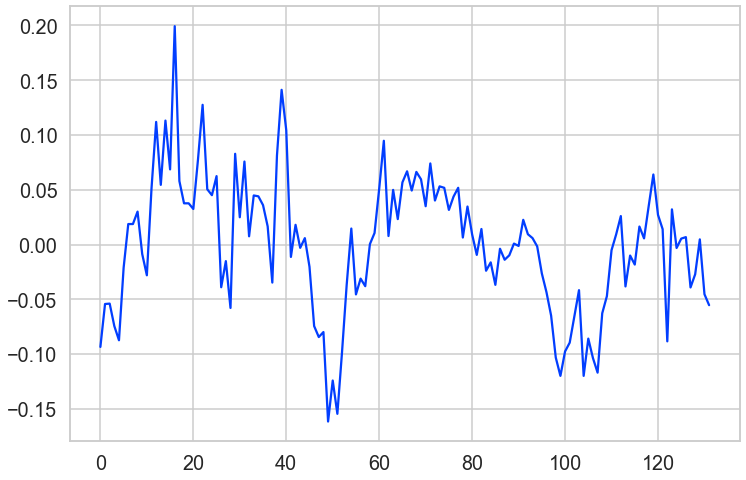

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(diff_logap-diff_logap.mean())

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

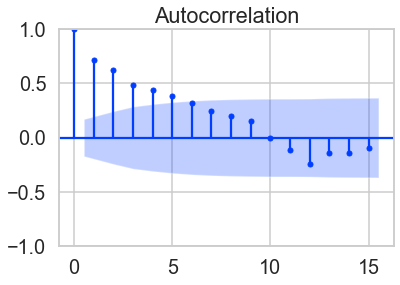

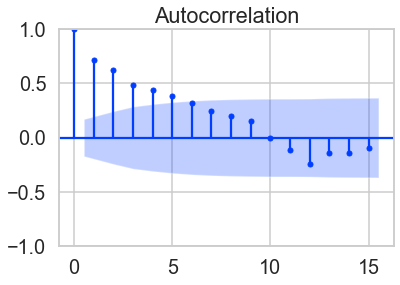

In [41]:
plot_acf(diff_logap-diff_logap.mean(), lags = 15) 

c:\Users\RedmiBook\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


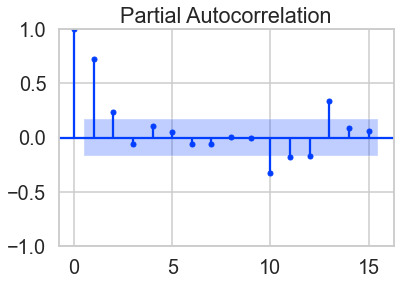

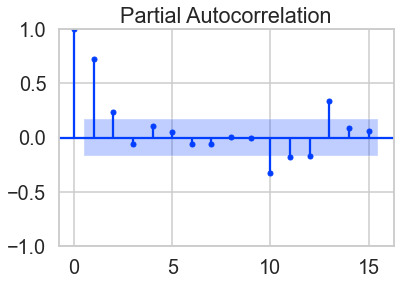

In [42]:
plot_pacf(diff_logap-diff_logap.mean(), lags=15)

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
res = adfuller(diff_logap-diff_logap.mean())
print(res)

(-2.7095768189885647, 0.0723956718176956, 12, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -424.76083484995365)


Choose AR(1), MA(6) model

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
arima_model = ARIMA(diff_logap, order=(1,0,12))

In [47]:
model = arima_model.fit()

c:\Users\RedmiBook\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:                ARIMA(1, 0, 12)   Log Likelihood                 254.326
Date:                Wed, 22 Feb 2023   AIC                           -478.651
Time:                        19:37:21   BIC                           -435.409
Sample:                             0   HQIC                          -461.080
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1178      0.014      8.279      0.000       0.090       0.146
ar.L1          0.7502      0.319      2.350      0.019       0.125       1.376
ma.L1         -0.0670      0.353     -0.190      0.849      -0.758       0.624
ma.L2          0.1371      0.284      0.484      0.629      -0.419       0.693
ma.L3         -0.0313      0.317     -0.099      0.922      -0.653       0.591
ma.L4         -0.1090      0.249     -0.438      0.661      -0.597       0.379
ma.L5          0.2069      0.180      1.152      0.249      -0.145       0.559
ma.L6          0.0461      0.213      0.217      0.829      -0.372       0.464
ma.L7          0.0810      0.222      0.364      0.716      -0.355       0.517
ma.L8          0.0310      0.200      0.155      0.876      -0.360       0.422
ma.L9          0.1597      0.206      0.774      0.439      -0.245       0.564
ma.L10         0.0512      0.194      0.264      0.792      -0.329       0.432
ma.L11         0.2173      0.193      1.124      0.261      -0.162       0.596
ma.L12        -0.5571      0.212     -2.624      0.009      -0.973      -0.141
sigma2         0.0012      0.000      5.094      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):                 8.26
Prob(Q):                              0.31   Prob(JB):                         0.02
Heteroskedasticity (H):               0.51   Skew:                             0.02
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
forcast_12 = model.forecast(12)

In [50]:
forcast_12

array([0.08623998, 0.08634938, 0.14653092, 0.09084711, 0.08978032,
       0.11530357, 0.11261845, 0.1145959 , 0.12118791, 0.11180828,
       0.1236688 , 0.1218936 ])

In [51]:
prev_12 = airpass.Passengers.to_numpy()[-24:-12]


In [52]:
predicts = np.exp(forcast_12)*prev_12
print(predicts)

[392.42444194 372.84400396 470.07115618 433.66021713 459.4522572
 529.68503315 613.32424311 626.87388116 522.65153784 455.14746666
 409.65404674 457.50173226]


In [53]:
airpass.Passengers.to_numpy()[-12:] - predicts

array([ 24.57555806,  18.15599604, -51.07115618,  27.33978287,
        12.5477428 ,   5.31496685,   8.67575689, -20.87388116,
       -14.65153784,   5.85253334, -19.65404674, -25.50173226])

In [54]:
model.aicc

-474.5132640299149

In [55]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [56]:
filepath = 'ls2.csv'
df = pd.read_csv(filepath)
print(df.shape)  # (123, 8)
df.tail()

(150, 2)


,Leads,Sales
145,13.50,263.3
146,13.58,262.8
147,13.51,261.8
148,13.77,262.2
149,13.40,262.7


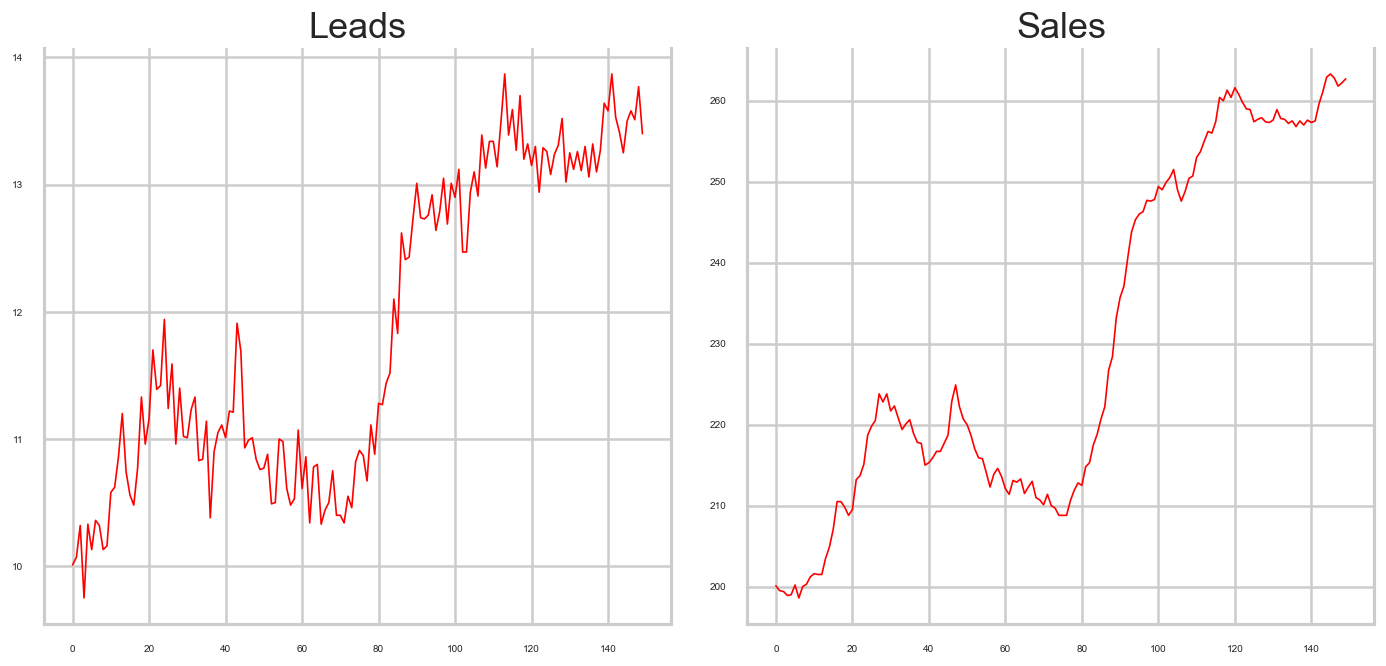

In [57]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(12,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [58]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,Leads_x,Sales_x
Leads_y,1.0,0.0002
Sales_y,0.0,1.0000


In [59]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Leads  ::  5.73      > 12.3212   =>   False
Sales  ::  1.75      > 4.1296    =>   False


In [60]:
nobs = 4
df_train, df_test = df, df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(150, 2)
(4, 2)


In [61]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [62]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Leads" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9606
 No. Lags Chosen       = 3
 Critical value 1%     = -3.476
 Critical value 5%     = -2.882
 Critical value 10%    = -2.577
 => P-Value = 0.7674. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Sales" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.01
 No. Lags Chosen       = 4
 Critical value 1%     = -3.476
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.7496. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [63]:
df_differenced = df_train.diff().dropna()

In [64]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Leads" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.8198
 No. Lags Chosen       = 1
 Critical value 1%     = -3.476
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Sales" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7223
 No. Lags Chosen       = 3
 Critical value 1%     = -3.476
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.0038. Rejecting Null Hypothesis.
 => Series is Stationary.




In [65]:
# # Second Differencing
# df_differenced = df_differenced.diff().dropna()

In [66]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Leads" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.8198
 No. Lags Chosen       = 1
 Critical value 1%     = -3.476
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Sales" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7223
 No. Lags Chosen       = 3
 Critical value 1%     = -3.476
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.0038. Rejecting Null Hypothesis.
 => Series is Stationary.




In [67]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -1.835786252541649
BIC :  -1.7142776468485093
FPE :  0.15948982612624096
HQIC:  -1.7864175867280727 

Lag Order = 2
AIC :  -2.075740555605806
BIC :  -1.8723097673895657
FPE :  0.12547006799547944
HQIC:  -1.993084419994483 

Lag Order = 3
AIC :  -4.465025542602491
BIC :  -4.178926277507171
FPE :  0.011506094954165647
HQIC:  -4.348776859013712 

Lag Order = 4
AIC :  -4.961942273294545
BIC :  -4.592416705269922
FPE :  0.007001557168601741
HQIC:  -4.811791536534144 

Lag Order = 5
AIC :  -5.123585634743038
BIC :  -4.669864158418926
FPE :  0.005958185962731662
HQIC:  -4.939218828821427 

Lag Order = 6
AIC :  -5.144400651325682
BIC :  -4.605701627642063
FPE :  0.005837842990129327
HQIC:  -4.9254991638690475 

Lag Order = 7
AIC :  -5.194303720024449
BIC :  -4.569833214897422
FPE :  0.005556863250423944
HQIC:  -4.94054425484247 

Lag Order = 8
AIC :  -5.273128338405879
BIC :  -4.562079854201214
FPE :  0.005139646855103701
HQIC:  -4.984182826180333 

Lag Order = 9
AIC :  -5

c:\Users\RedmiBook\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [68]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-1.487,-1.445,0.2260,-1.470
1,-1.776,-1.648,0.1694,-1.724
2,-2.006,-1.793,0.1346,-1.919
3,-4.393,-4.095,0.01236,-4.272
4,-4.913,-4.529,0.007354,-4.757
5,-5.106,-4.638*,0.006062,-4.916
6,-5.130,-4.576,0.005923,-4.905
7,-5.191,-4.551,0.005579,-4.931
8,-5.275*,-4.550,0.005132*,-4.980*
9,-5.267,-4.457,0.005176,-4.938


In [69]:
model_fitted = model.fit(8)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Feb, 2023
Time:                     19:37:23
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.56208
Nobs:                     141.000    HQIC:                  -4.98418
Log likelihood:           5.61488    FPE:                 0.00513965
AIC:                     -5.27313    Det(Omega_mle):      0.00409315
--------------------------------------------------------------------
Results for equation Leads
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.028722         0.028299            1.015           0.310
L1.Leads        -0.481981         0.088671           -5.436           0.000
L1.Sales         0.105031         0.109512            0.959           0.338
L2.L

In [70]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
def adjust(val, length= 6): return str(val).ljust(length)
for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Leads  : 1.94
Sales  : 2.07


In [71]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

8


array([[-0.34,  2.1 ],
       [-0.12,  1.5 ],
       [-0.16,  1.8 ],
       [ 0.25,  0.4 ],
       [ 0.08, -0.5 ],
       [-0.07, -1.  ],
       [ 0.26,  0.4 ],
       [-0.37,  0.5 ]])

In [72]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,Leads_1d,Sales_1d
146,0.227536,0.202879
147,-0.041214,1.425581
148,0.103557,-0.760317
149,-0.037006,0.517709


In [73]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d']
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d']
    return df_fc

In [74]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)        
df_results.loc[:, ['Leads_forecast', 'Sales_forecast']]

,Leads_forecast,Sales_forecast
146,13.627536,262.902879
147,13.358786,264.125581
148,13.503557,261.939683
149,13.362994,263.217709


In [75]:
df.tail()

,Leads,Sales
145,13.50,263.3
146,13.58,262.8
147,13.51,261.8
148,13.77,262.2
149,13.40,262.7


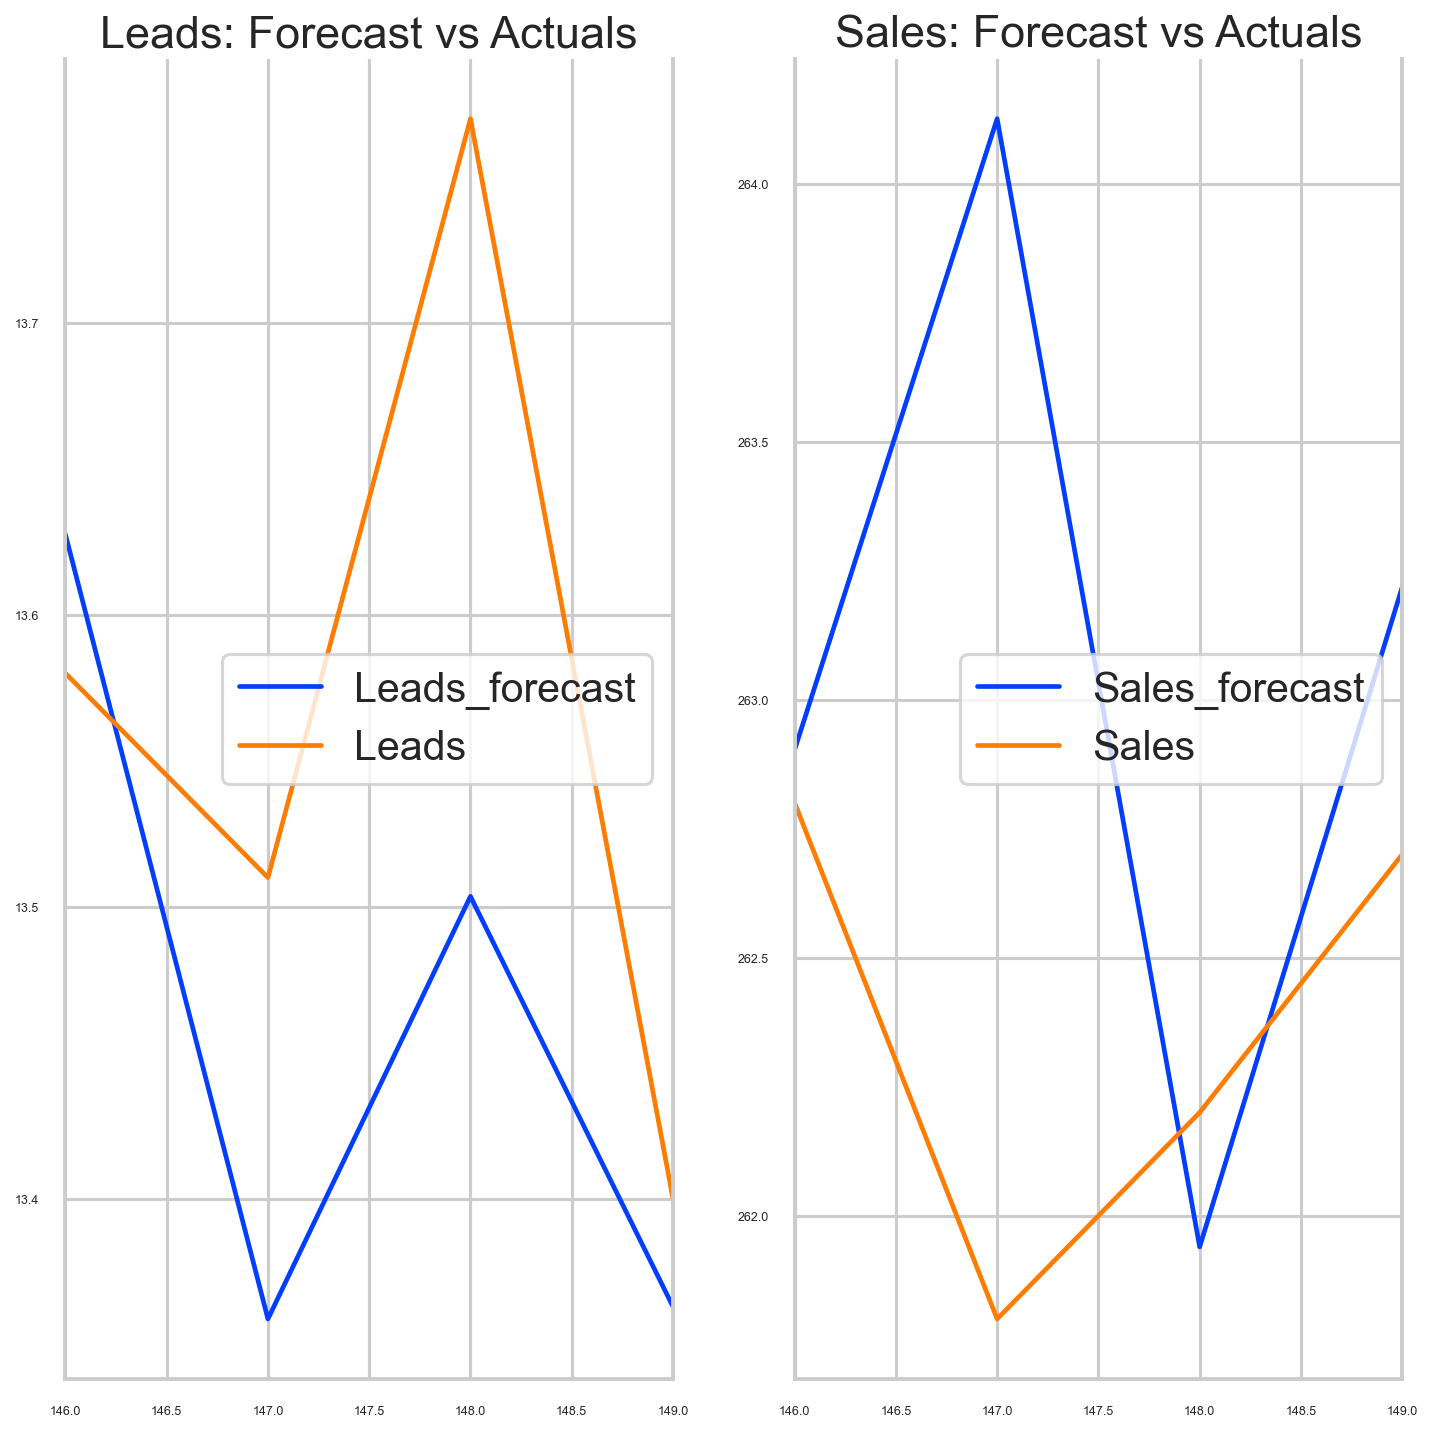

In [76]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [77]:
from statsmodels.tsa.stattools import levinson_durbin

In [86]:
res = levinson_durbin([ 0.9**2,1+0.9**2, 0, 0, 0], 4, True)

In [87]:
res[1]

array([-1.83337485,  1.82046057,  1.0186936 , -2.27634003])

# Durbin-Levinson

In [88]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import levinson_durbin


np.random.seed(0)
Ariel = ArmaProcess.from_coeffs([], [-0.9]).generate_sample(nsample=100000)

Belle = levinson_durbin(Ariel, nlags=4, isacov=False)
print(Belle[1])

[-0.78161192 -0.57669292 -0.38131148 -0.19349129]


In [89]:
from statsmodels.tsa.stattools import acovf

# assuming you have a time series called 'y'
# and a chosen AR order of p = 3
y = Ariel
p = 4

# initialize the algorithm with the first p autocorrelations
acvf = acovf(y, fft=False, missing='drop', nlag=p)
print("ACVF:",acvf)

# initialize the coefficients and the recursion variables
phi = np.zeros((p+1, p+1))
mse = np.zeros(p+1)


phi[1, 1] = acvf[1] / acvf[0]
mse[0]    = acvf[0]
mse[1]    = mse[0] * (1 - phi[1, 1]**2)

# run the Levinson-Durbin algorithm
for n in range(2, p+1):
    phi[n, n] = acvf[n];
    for j in range(1, n):
        phi[n, n] -= phi[n-1, j] * acvf[n-j]
    phi[n, n] /= mse[n-1];

    for j in range(1, n):
        phi[n, j] = phi[n-1, j] - phi[n, n] * phi[n-1, n-j]
    
    mse[n] = mse[n-1] * (1 - phi[n, n]**2)

Belle = phi;
print(Belle[1:,1:])

ACVF: [ 1.79611334e+00 -8.90469605e-01 -2.16083916e-04  1.11587877e-03
 -8.73356956e-03]
[[-0.49577584  0.          0.          0.        ]
 [-0.65742686 -0.32605666  0.          0.        ]
 [-0.73536262 -0.48319826 -0.23902522  0.        ]
 [-0.78161192 -0.57669292 -0.38131148 -0.19349129]]


# Innovations

In [90]:
from statsmodels.tsa.stattools import innovations_algo, acovf


# Ariel = np.random.randn(100)
Cindy = acovf(Ariel, unbiased=False)
Belle = innovations_algo(Cindy[:5])
print(Belle[0])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.95775843e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.57426859e-01 -1.20306392e-04  0.00000000e+00  0.00000000e+00]
 [-7.35362625e-01  2.48879273e-04  6.21274142e-04  0.00000000e+00]
 [-7.81611923e-01 -1.92472088e-03 -2.37259640e-03 -4.86248243e-03]]


C:\Users\RedmiBook\AppData\Local\Temp\ipykernel_13456\492049804.py:5: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  Cindy = acovf(Ariel, unbiased=False)
